# Сборный проект 2: Определение потребительской лояльности среди клиентов для телекоммуникационной компании.

<a id='section_id'></a>
## Цели исследования

1. Определить текущий уровень потребительской лояльности, или NPS среди клиентов из России.
2. Оформить результаты в визуальном представлении.

<a id='section_id1'></a>
## Поставленные вопросы

1. Как распределены участники опроса:
    * Каких пользователей больше по возрасту;
    * Каких пользователей больше по полу и возрасту;
    * Каких пользователей больше: новых или старых?
    * Пользователи из каких городов активнее участвовали в опросе?
2. Какие группы пользователей наиболее и наименее лояльны к сервису?
3. Какой общий NPS среди всех опрошенных?
4. Как можно описать клиентов, которые относятся к группе cторонников?

<a id='section_id2'></a>
## Оглавление

[1. Цели исследования](#section_id)

[2. Поставленные вопросы](#section_id1)

[3. Оглавление](#section_id2)

[4. Библиотеки](#section_id3)

[5. Ключ к данным](#section_id4)

[6. Подготовка данных](#section_id5)

[7. Исследование](#section_id6)

[    - 7.1. Распределение опрошенных городов](#section_id7)

[    - 7.2. Данные об опрошенных клиентах](#section_id8)
    
[    - 7.3. Портрет клиента по мнению об услугах](#section_id9)

[    - 7.4. NPS](#section_id10)
    
[    - 7.5. Портрет лояльного клиента](#section_id11)

<a id='section_id3'></a>
## Библиотеки

In [1]:
import os
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy import text

<a id='section_id4'></a>
## Ключ к данным

In [2]:
info_data = {
    'Название столбца': ['user_id', 
                         'lt_day',
                         'is_new',
                         'age',
                         'gender_segment',
                         'os_name',
                         'cpe_type_name',
                         'country',
                         'city',
                         'age_segment',
                         'traffic_segment',
                         'lifetime_segment',
                         'nps_score',
                         'nps_group'],
    'Описание': ['Идентификатор клиента',
                 'Количество дней «жизни» клиента',
                 'Поле хранит информацию о том, является ли клиент новым',
                 'Возраст клиента в годах',
                 'Пол клиента',
                 'Тип операционной системы',
                 'Тип устройства',
                 'Страна проживания',
                 'Город проживания',
                 'Возрастной сегмент',
                 'Сегмент по объёму потребляемого трафика',
                 'Сегмент по количеству дней «жизни»',
                 'Оценка клиента в NPS-опросе',
                 'Поле хранит информацию о том, к какой группе относится оценка клиента в опросе']
    }

info_df = pd.DataFrame(info_data)
info_df

,Название столбца,Описание
0,user_id,Идентификатор клиента
1,lt_day,Количество дней «жизни» клиента
2,is_new,"Поле хранит информацию о том, является ли клие..."
3,age,Возраст клиента в годах
4,gender_segment,Пол клиента
5,os_name,Тип операционной системы
6,cpe_type_name,Тип устройства
7,country,Страна проживания
8,city,Город проживания
9,age_segment,Возрастной сегмент


<a id='section_id5'></a>
## Подготовка данных

In [3]:
query = text("""
    WITH data_cte AS (
    SELECT
        u.user_id,
        u.lt_day,
        u.age,
        u.gender_segment,
        u.os_name,
        u.cpe_type_name,
        l.country,
        l.city,
        SUBSTR(a.title, 3) AS age_segment,
        SUBSTR(t.title, 3) AS traffic_segment,
        SUBSTR(lt.title, 3) AS lifetime_segment,
        u.nps_score,
        CASE WHEN u.nps_score >= 9 THEN 'сторонники'
             WHEN u.nps_score >= 7 THEN 'нейтралы'
             ELSE 'критики'
        END AS nps_group,
        CASE WHEN u.lt_day <= 365 THEN 'True' ELSE 'False' END AS is_new
    FROM
        user AS u
        LEFT JOIN location AS l ON l.location_id = u.location_id
        LEFT JOIN age_segment AS a ON a.age_gr_id = u.age_gr_id
        LEFT JOIN traffic_segment AS t ON t.tr_gr_id = u.tr_gr_id
        LEFT JOIN lifetime_segment AS lt ON lt.lt_gr_id = u.lt_gr_id
)
SELECT *
FROM data_cte;
""")

In [4]:
database_path = '/datasets/telecomm_csi.db'
engine = create_engine(f'sqlite:///{database_path}')
Session = sessionmaker(bind=engine)
session = Session()

In [5]:
result = session.execute(query)
df = pd.DataFrame(result.fetchall(), columns=result.keys())

In [6]:
df.head(10)

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group,is_new
0,A001A2,2320,45.0,1.0,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,сторонники,False
1,A001WF,2344,53.0,0.0,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,сторонники,False
2,A003Q7,467,57.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,сторонники,False
3,A004TB,4190,44.0,1.0,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,сторонники,False
4,A004XT,1163,24.0,0.0,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,сторонники,False
5,A005O0,5501,42.0,1.0,ANDROID,SMARTPHONE,Россия,Омск,35-44,5-10,36+,6,критики,False
6,A0061R,1236,45.0,0.0,ANDROID,SMARTPHONE,Россия,Уфа,45-54,10-15,36+,10,сторонники,False
7,A009KS,313,35.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,35-44,45-50,7-12,10,сторонники,True
8,A00AES,3238,36.0,1.0,ANDROID,SMARTPHONE,Россия,СанктПетербург,35-44,1-5,36+,10,сторонники,False
9,A00F70,4479,54.0,1.0,ANDROID,SMARTPHONE,Россия,Волгоград,45-54,15-20,36+,9,сторонники,False


Полученные данные будут использованы для построения дашбордов с результатами анализа.

In [7]:
df.to_csv('telecomm_csi_tableau.csv', index=False)

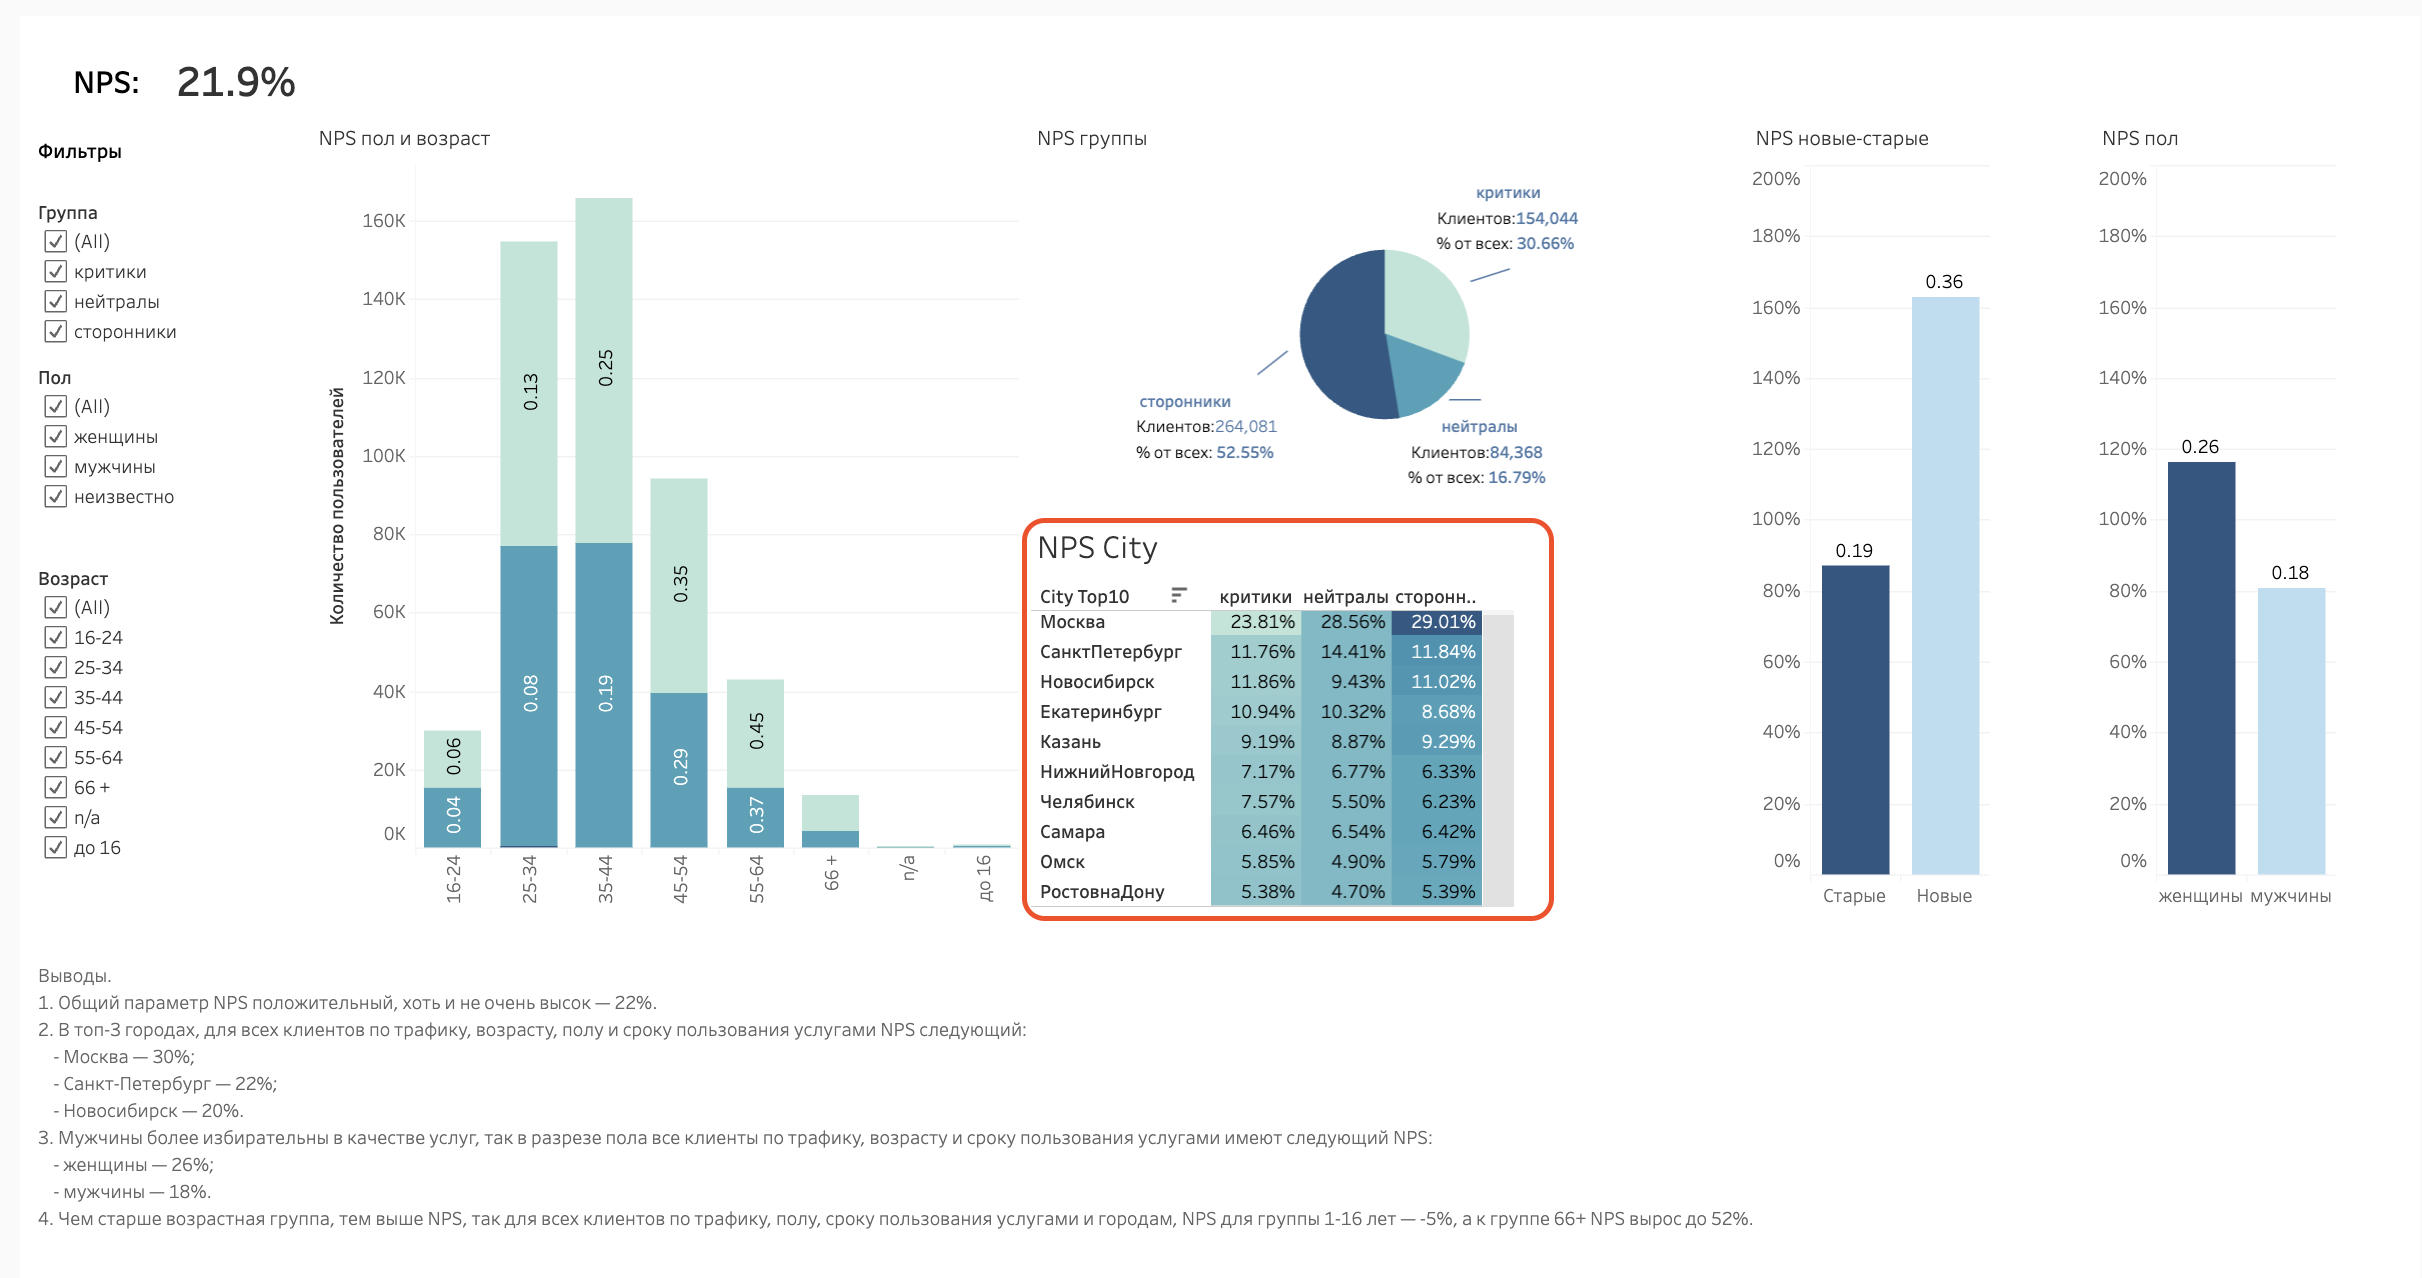

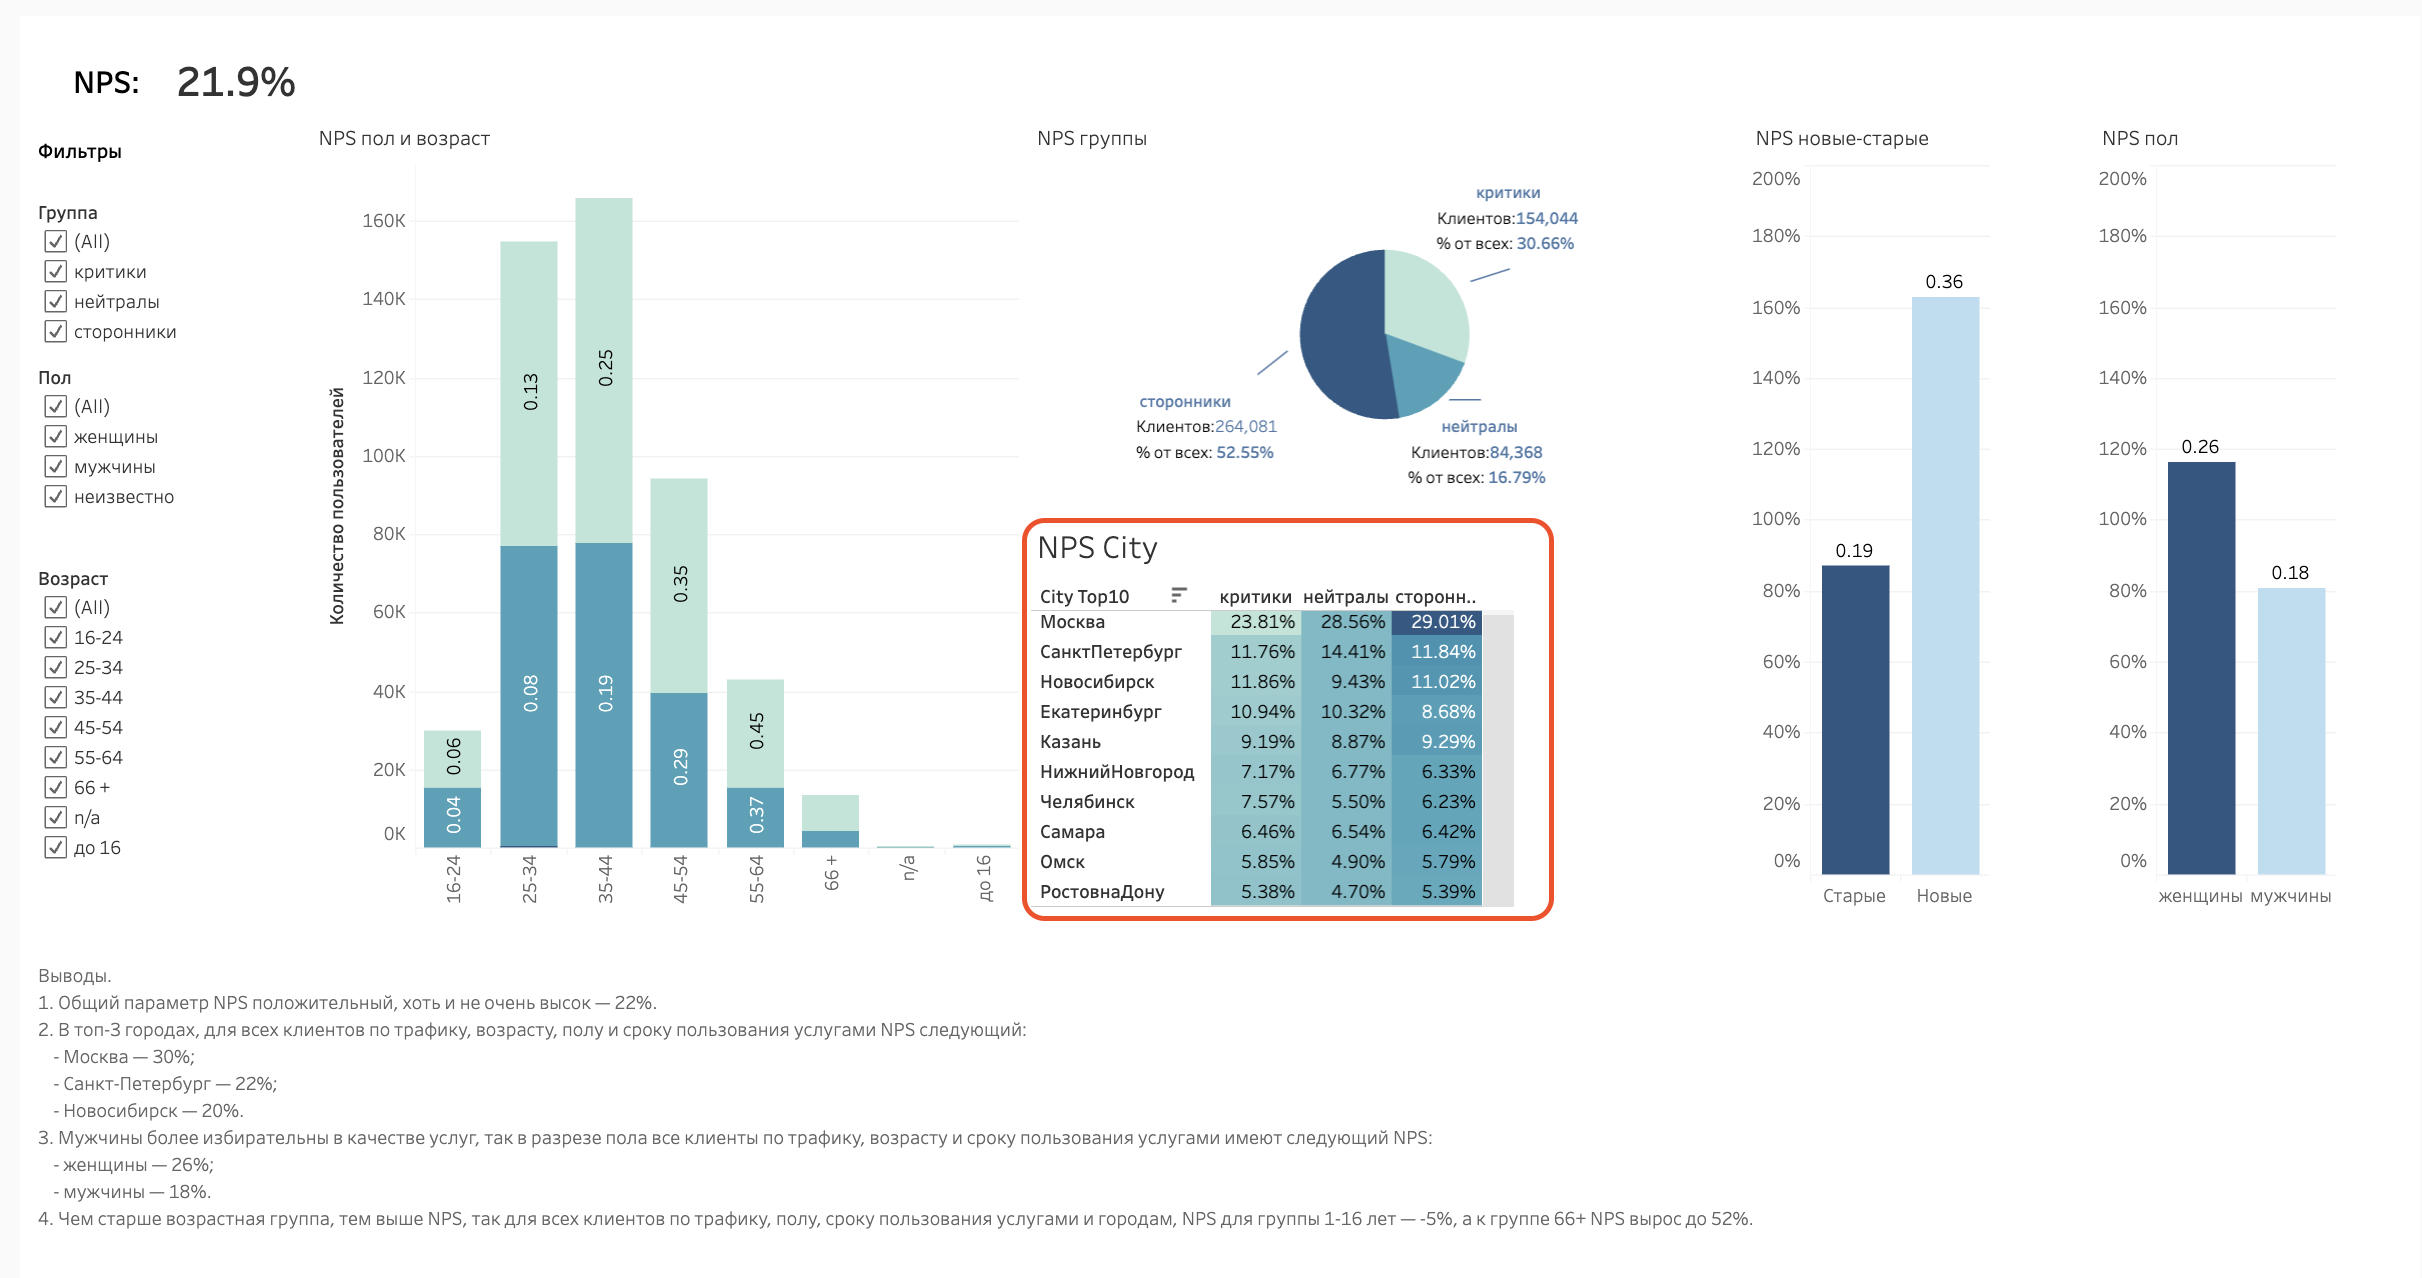

<a id='section_id6'></a>
## Исследование

Результаты исследования представленны в формате презентации на [Tableau.com](https://public.tableau.com/views/Project2_0_17133447310530/4?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)

<a id='section_id7'></a>
### Распределение городов в которых был проведен опрос

In [8]:
html = "<div class='tableauPlaceholder' id='viz1713590738408' style='position: relative'><noscript><a href='#'><img alt='Опрос по качеству услуг ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;FW&#47;FWG88FPTT&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;FWG88FPTT' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;FW&#47;FWG88FPTT&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1713590738408');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"
display(HTML(html))

<a id='section_id8'></a>
### Данные о клиентах. Распределение по топ-10 городов и продолжительности пользования услугами

In [9]:
html1 = "<div class='tableauPlaceholder' id='viz1713592883970' style='position: relative'><noscript><a href='#'><img alt='Опрос по качеству услуг ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;44&#47;44FTBBZWX&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;44FTBBZWX' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;44&#47;44FTBBZWX&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1713592883970');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"
display(HTML(html1))

<a id='section_id9'></a>
### Портрет клиента по мнению о получаемых телекоммуникационных услугах

In [10]:
html2 = "<div class='tableauPlaceholder' id='viz1713592969304' style='position: relative'><noscript><a href='#'><img alt='Опрос по качеству услуг ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Q5&#47;Q59C8688N&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;Q59C8688N' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Q5&#47;Q59C8688N&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1713592969304');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"
display(HTML(html2))

<a id='section_id10'></a>
### Определение NPS(Net Promoter Score) клиентов по категориям

In [11]:
html3 = "<div class='tableauPlaceholder' id='viz1713593066447' style='position: relative'><noscript><a href='#'><img alt='Опрос по качеству услуг ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;XF&#47;XFSGR897T&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;XFSGR897T' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;XF&#47;XFSGR897T&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1713593066447');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"
display(HTML(html3))

<a id='section_id11'></a>
### Портрет лояльного клиента

In [12]:
html4 = "<div class='tableauPlaceholder' id='viz1713593184313' style='position: relative'><noscript><a href='#'><img alt='Опрос по качеству услуг ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;CT&#47;CTYNZRZ94&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;CTYNZRZ94' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;CT&#47;CTYNZRZ94&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1713593184313');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"
display(HTML(html4))

Добрый день, проект подготовлен, желаю хорошего настроения в текущем дне!✨🎈